In [21]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pwlf
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter

colors = ['fuchsia', 'blue', 'green', 'tab:orange', 'tab:red']
linestyles = ['solid', 'dashdot', 'dashed', 'dotted', (0, (3, 5, 1, 5, 1, 5))]
time_slc = slice(6, 8) # last 5ns of data

xmin_all = 0
xmax_all = 1.75

In [22]:
malodour_molecules = ["MBA", "HEP", "ETB"]
atoms_per_mol = [17, 20, 20]
times = np.arange(0, 40000, 5000)

# Hydrated system

In [23]:
hydrated_paths = sorted(glob.glob("hydrated/run*"))


times = np.arange(0, 40000, 5000)
# labels = ["void", "radii", "PET", "MBA", "HEP", "ETB", "SOL"]

# indexes to get
# PET - mal
# PET - water
# mal - water

## Bonding interactions

In [24]:
max_idx = 901
slc = slice(0, max_idx)

dipole = np.zeros((len(malodour_molecules), len(hydrated_paths), 9, 2, max_idx)) 
vdw = np.zeros((len(malodour_molecules), len(hydrated_paths), 9, 2, max_idx))

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(hydrated_paths):
        spec_path = f"{path}/{mal}"
        rdf_dipole_paths = sorted(glob.glob(spec_path + "/rdf_dipole*"))
        rdf_vdw_paths = sorted(glob.glob(spec_path + "/rdf_vdw*"))

        for k in range(len(rdf_dipole_paths)):
            data = np.loadtxt(rdf_dipole_paths[k], comments=['@', '#'])
            dipole[i, j, k, 0, :] = data[slc, -2] # dipole interaction
            dipole[i, j, k, 1, :] = data[slc, -1] # vdw interaction

            data = np.loadtxt(rdf_vdw_paths[k], comments=['@', '#'])
            vdw[i, j, k, 0, :] = data[slc, -2] # vdw interaction
            vdw[i, j, k, 1, :] = data[slc, -1] # dipole interaction

radii = data[slc, 0]

avg_dipole = np.average(dipole, axis = 1)
std_dipole = np.std(dipole, axis = 1)

avg_vdw = np.average(vdw, axis = 1)
std_vdw = np.std(vdw, axis = 1)

### Dipole interactions

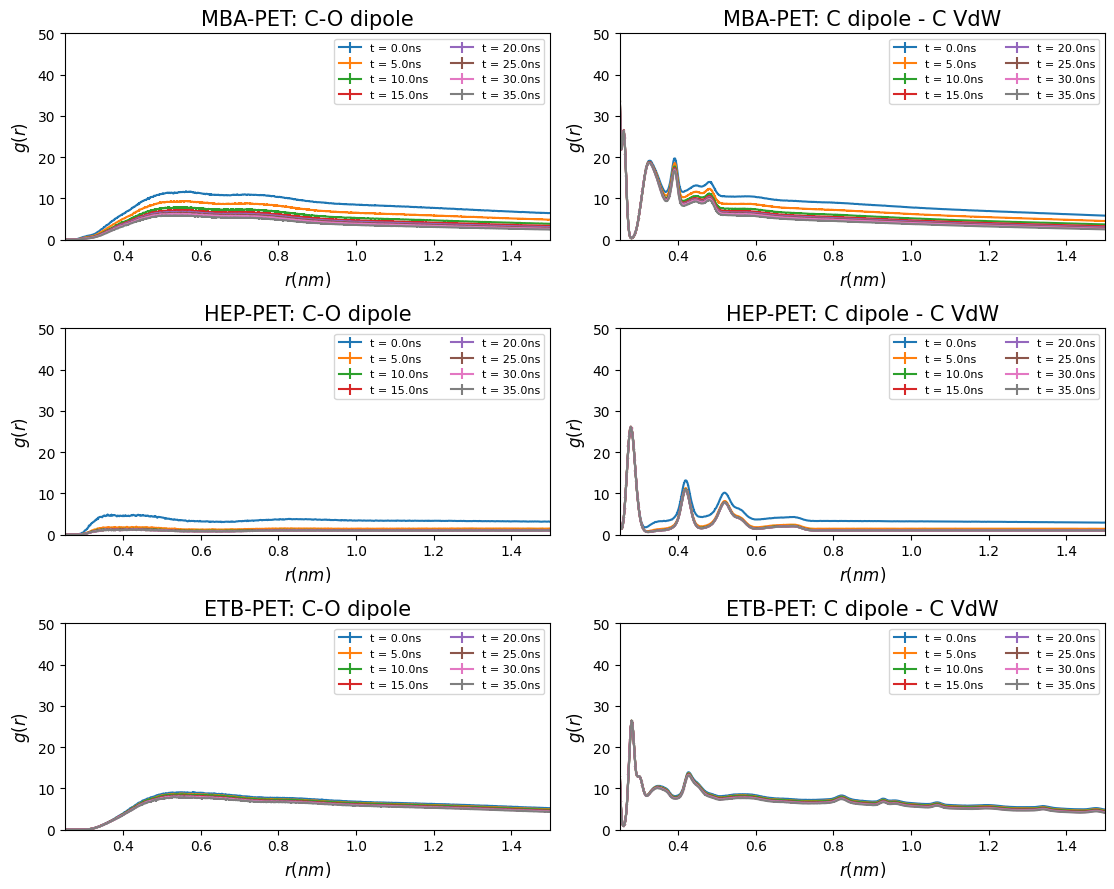

In [25]:
sz = 9
ar = 1.25

avg_in = avg_dipole.copy()
std_in = std_dipole.copy()

labels = [["MBA-PET: C-O dipole", "MBA-PET: C dipole - C VdW"], ["HEP-PET: C-O dipole", "HEP-PET: C dipole - C VdW"], ["ETB-PET: C-O dipole", "ETB-PET: C dipole - C VdW"]]

fig, axs = plt.subplots(3, 2, figsize = (sz*ar, sz))

xmin = 0.25
xmax = 1.5

ymin = 0
ymax = 50

for i in range(3):
    for j in range(2):
        ax = axs[i, j] 
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        for k in range(8):
            ax.errorbar(radii, np.abs(avg_in[i, k, j, :]), yerr=std_in[i, k, j, :], label = f"t = {times[k]/1000}ns")
        ax.legend(fontsize = 8, ncol = 2)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_title(f"{labels[i][j]}", fontsize = 15)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        # ax.set_yscale('log')

fig.tight_layout()
fig.savefig("hyd_dipole-bond_time-series.svg")
fig.savefig("hyd_dipole-bond_time-series.png", dpi = 300)

[0.536]
[]
[0.542]
[0.326 0.39 ]
[0.278 0.42  0.52 ]
[0.28  0.428]


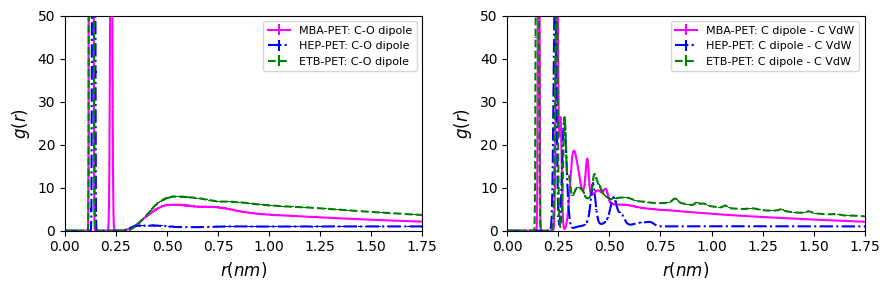

In [26]:
avg_all = np.mean(avg_dipole[:, time_slc, :, :], axis = 1)
std_all = np.std(avg_dipole[:, time_slc, :, :], axis = 1)
sz = 6
ar = 1.5

fig, axs = plt.subplots(1, 2, figsize = (sz*ar, sz/2))

# avg_all.shape

for i in range(2):
    ax = axs[i]
    for j in range(3):
        x = radii
        y = avg_all[j, i]
        yerr = std_all[j, i]

        ysmooth = gaussian_filter(y, 1)
        idxs = find_peaks(ysmooth, prominence=2)[0]
        print(x[idxs][np.where(x[idxs] >= xmin)])
        # print(find_peaks(ysmooth, prominence=1)[1])

        # ax.plot(x, ysmooth, label = labels[j][i], color = colors[j], linestyle = linestyles[j])
        ax.errorbar(x, y, yerr=yerr, label = labels[j][i], color = colors[j], linestyle = linestyles[j])
        ax.legend(fontsize = 8, ncol = 1)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        
        # ax.set_xlabel(r"$r (\AA)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        ax.set_xlim([xmin_all, xmax_all])
        ax.set_ylim([0, 50])
        

fig.tight_layout()
fig.savefig("hyd_dipole-bond.svg")
fig.savefig("hyd_dipole_bond.png", dpi = 300)

### VdW interactions

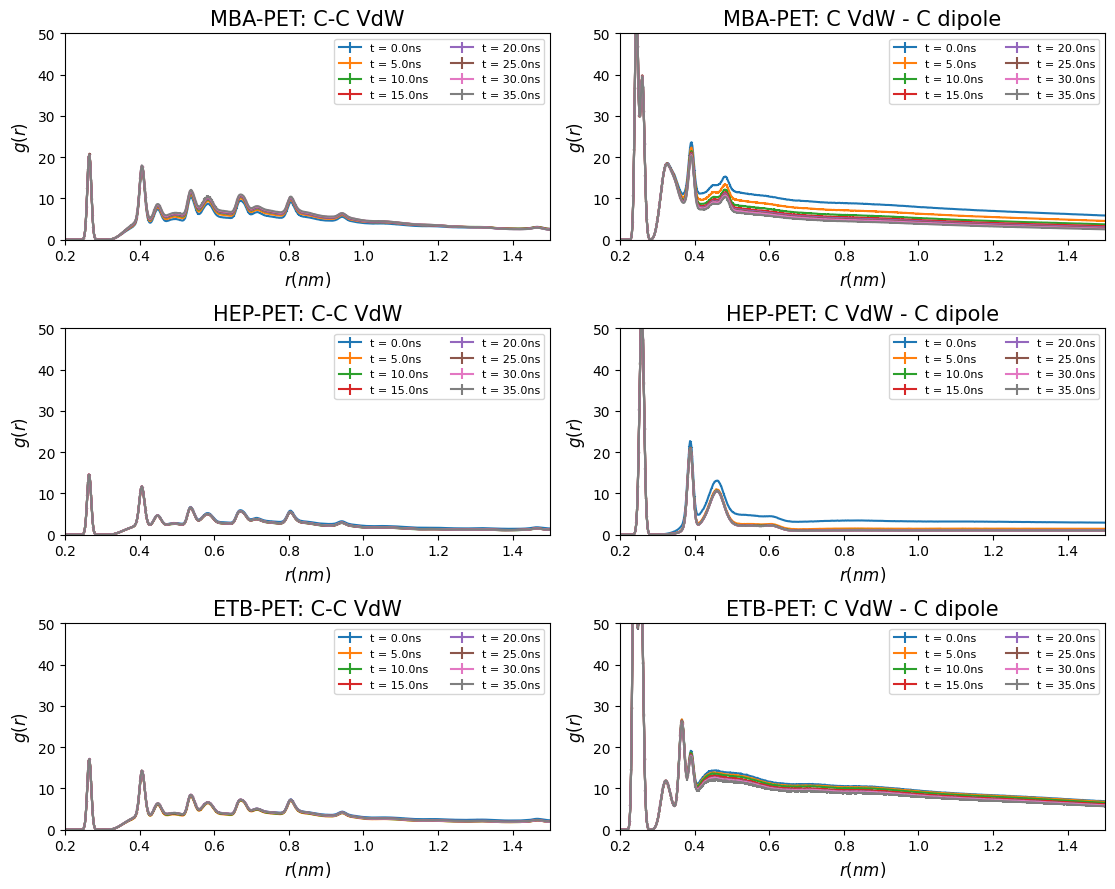

In [27]:
sz = 9
ar = 1.25

avg_in = avg_vdw.copy()
std_in = std_vdw.copy()

labels = [["MBA-PET: C-C VdW", "MBA-PET: C VdW - C dipole"], ["HEP-PET: C-C VdW", "HEP-PET: C VdW - C dipole"], ["ETB-PET: C-C VdW", "ETB-PET: C VdW - C dipole"]]

fig, axs = plt.subplots(3, 2, figsize = (sz*ar, sz))

xmin = 0.2
xmax = 1.5

ymin = 0
ymax = 50

for i in range(3):
    for j in range(2):
        ax = axs[i, j] 
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        for k in range(8):
            ax.errorbar(radii, np.abs(avg_in[i, k, j, :]), yerr=std_in[i, k, j, :], label = f"t = {times[k]/1000}ns")
        ax.legend(fontsize = 8, ncol = 2)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_title(f"{labels[i][j]}", fontsize = 15)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        # ax.set_yscale('log')

fig.tight_layout()
fig.savefig("hyd_vdw-bond_time-series.svg")
fig.savefig("hyd_vdw-bond_time-series.png", dpi = 300)

[0.266 0.406 0.448 0.538 0.584 0.672 0.806]
[0.264 0.406 0.448 0.536 0.67  0.804]
[0.266 0.406 0.45  0.538 0.672 0.806]
[0.244 0.26  0.326 0.392 0.482]
[0.258 0.388 0.46 ]
[0.24  0.256 0.324 0.366 0.39  0.456]


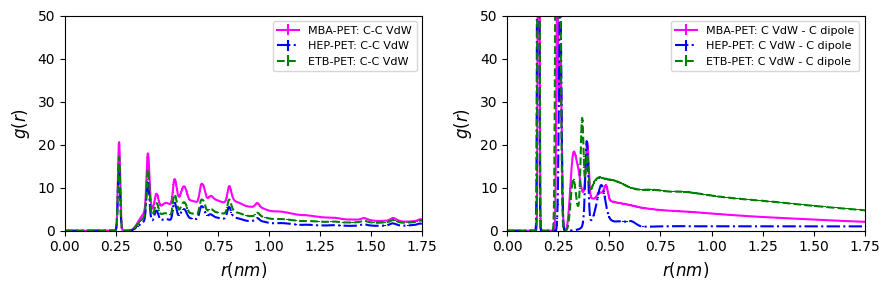

In [28]:
avg_all = np.mean(avg_vdw[:, time_slc, :, :], axis = 1)
std_all = np.std(avg_vdw[:, time_slc, :, :], axis = 1)
sz = 6
ar = 1.5

fig, axs = plt.subplots(1, 2, figsize = (sz*ar, sz/2))


# avg_all.shape

for i in range(2):
    ax = axs[i]
    for j in range(3):
        x = radii
        y = avg_all[j, i]
        yerr = std_all[j, i]

        ysmooth = gaussian_filter(y, 1)
        idxs = find_peaks(ysmooth, prominence=2)[0]
        print(x[idxs][np.where(x[idxs] >= xmin)])

        # ax.plot(x, ysmooth, label = labels[j][i], color = colors[j], linestyle = linestyles[j])
        ax.errorbar(x, y, yerr=yerr, label = labels[j][i], color = colors[j], linestyle = linestyles[j])
        ax.legend(fontsize = 8, ncol = 1)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        
        # ax.set_xlabel(r"$r (\AA)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        ax.set_xlim([xmin_all, xmax_all])
        ax.set_ylim([0, 50])
        

fig.tight_layout()
fig.savefig("hyd_vdw-bond.svg")
fig.savefig("hyd_vdw-bond.png", dpi = 300)

## RDF

### Inter-species

In [29]:
max_idx = 150
slc = slice(0, max_idx)

all_data = np.zeros((len(malodour_molecules), len(hydrated_paths), 9, 3, max_idx))

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(hydrated_paths):
        spec_path = f"{path}/{mal}"
        rdf_PET_paths = sorted(glob.glob(spec_path + "/rdf_PET*"))
        rdf_mal_paths = sorted(glob.glob(spec_path + "/rdf_mal*"))
        if len(rdf_PET_paths) > 0:
            for k in range(len(rdf_PET_paths)):
                data = np.loadtxt(rdf_PET_paths[k], comments=['@', '#'])
                all_data[i, j, k, 0, :] = data[slc, -2]
                all_data[i, j, k, 1, :] = data[slc, -1]

                data = np.loadtxt(rdf_mal_paths[k], comments=['@', '#'])
                all_data[i, j, k, 2, :] = data[slc, -1]
        else:
            continue

radii = data[slc, 0]

# all_data = np.where(all_data == 0, np.NaN, all_data)
avg_data = np.average(all_data, axis = 1)
std_data = np.std(all_data, axis = 1)

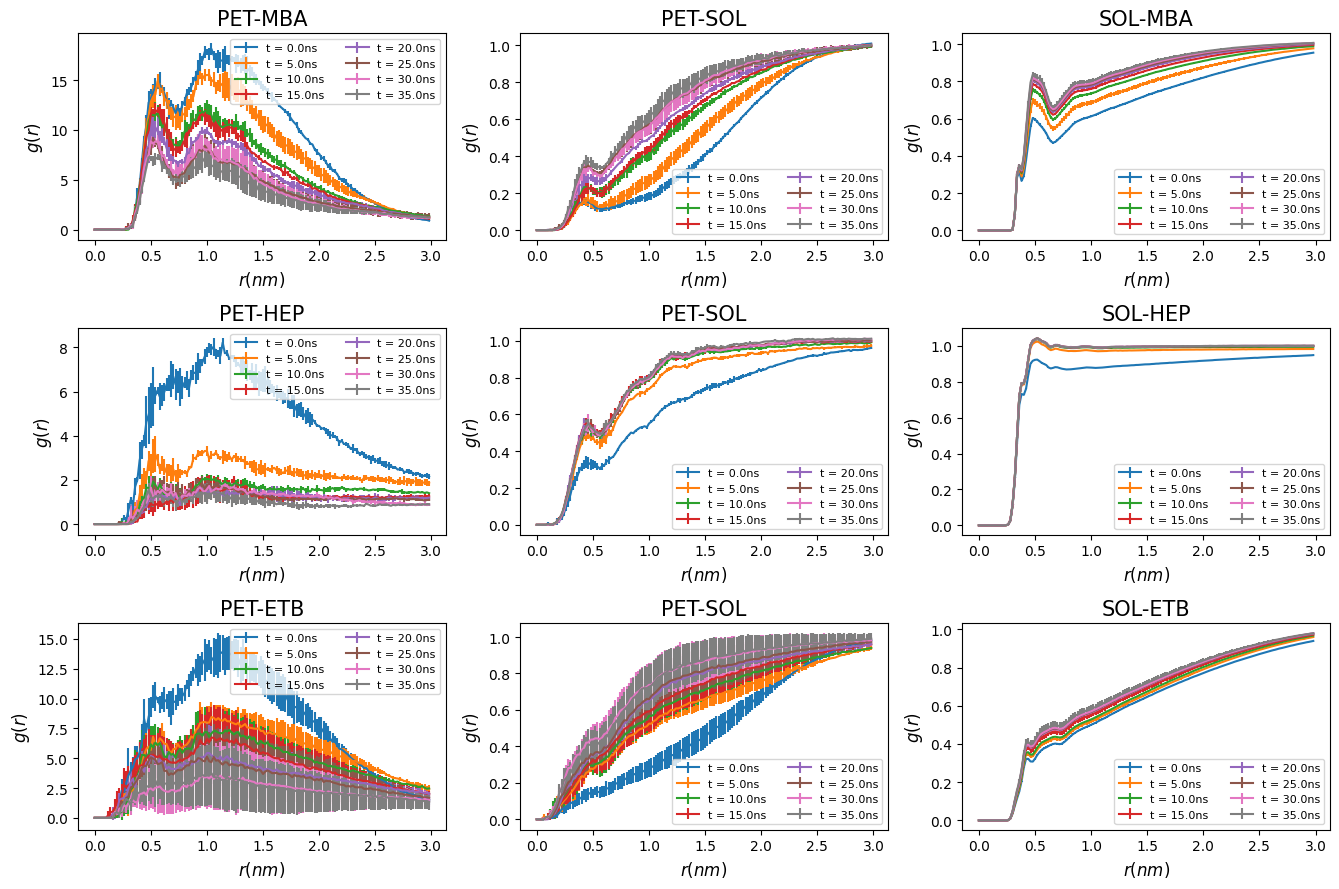

In [30]:
sz = 3
ar = 1.5

avg_in = avg_data.copy()
std_in = std_data.copy()

labels = [["PET-MBA", "PET-HEP", "PET-ETB"], ["PET-SOL"]*3, ["SOL-MBA", "SOL-HEP", "SOL-ETB"]]

fig, axs = plt.subplots(3, 3, figsize = (sz*ar*3, sz*3))

for i in range(3):
    for j in range(3):
        ax = axs[i, j] 
        for k in range(8):
            ax.errorbar(radii, avg_in[i, k, j, :], yerr=std_in[i, k, j, :], label = f"t = {times[k]/1000}ns")
        ax.legend(fontsize = 8, ncol = 2)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_title(f"{labels[j][i]}", fontsize = 15)
        ax.tick_params(axis='both', which='minor', labelsize=8)

fig.tight_layout()
fig.savefig("hyd_mal-pet_time-series.svg")
fig.savefig("hyd_mal-pet_time-series.png", dpi = 300)

[0.54 0.96 1.18]
[0.5  0.58 0.94 1.02 1.14 1.4  1.66 1.88 1.98 2.08 2.36 2.42 2.58 2.7
 2.82 2.92]
[0.56 0.68 0.96 1.02 1.2  2.28 2.56]
[0.46]
[0.46 1.22 1.56 2.46 2.64 2.78 2.94]
[2.46]
[0.5]
[0.52 0.7  0.94 1.24 1.5  1.74 1.82 1.88 2.06 2.18 2.26 2.36 2.44 2.56
 2.64 2.76 2.9 ]
[0.68]


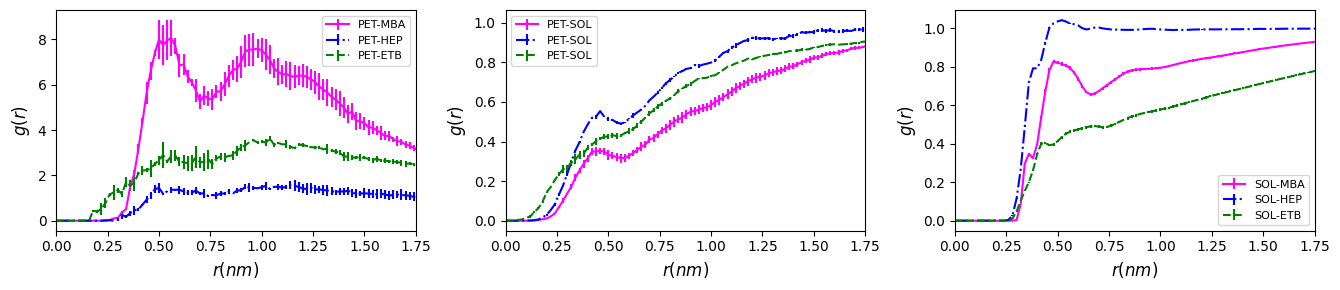

In [31]:
avg_all = np.mean(avg_data[:, time_slc, :, :], axis = 1)
std_all = np.std(avg_data[:, time_slc, :, :], axis = 1)
sz = 9
ar = 1.5

fig, axs = plt.subplots(1, 3, figsize = (sz*ar, sz/3))

for i in range(3):
    ax = axs[i]
    for j in range(3):

        x = radii
        y = avg_all[j, i]
        yerr = std_all[j, i]

        ysmooth = gaussian_filter(y, 1)
        idxs = find_peaks(ysmooth)[0]
        print(x[idxs][np.where(x[idxs] >= xmin)])

        ax.errorbar(x, y, yerr=yerr, label = labels[i][j], color = colors[j], linestyle = linestyles[j])
        ax.legend(fontsize = 8, ncol = 1)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        # ax.set_xlabel(r"$r (\AA)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        ax.set_xlim([xmin_all, xmax_all])
        # ax.set_ylim([0, 50])

fig.tight_layout()

fig.savefig("hyd_mal-pet.svg")
fig.savefig("hyd_mal-pet.png", dpi = 300)

### Intra-species

In [32]:
max_idx = 150
slc = slice(0, max_idx)

all_data = np.zeros((len(malodour_molecules), len(hydrated_paths), 9, 2, max_idx))

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(hydrated_paths):
        spec_path = f"{path}/{mal}"
        rdf_PET_paths = sorted(glob.glob(spec_path + "/rdf_PET*"))
        rdf_mal_paths = sorted(glob.glob(spec_path + "/rdf_mal*"))
        if len(rdf_PET_paths) > 0:
            for k in range(len(rdf_PET_paths)):
                data = np.loadtxt(rdf_PET_paths[k], comments=['@', '#'])
                all_data[i, j, k, 0, :] = data[slc, 1]

                data = np.loadtxt(rdf_mal_paths[k], comments=['@', '#'])
                all_data[i, j, k, 1, :] = data[slc, 1]
        else:
            continue

radii = data[slc, 0]

# all_data = np.where(all_data == 0, np.NaN, all_data)
avg_data = np.average(all_data, axis = 1)
std_data = np.std(all_data, axis = 1)

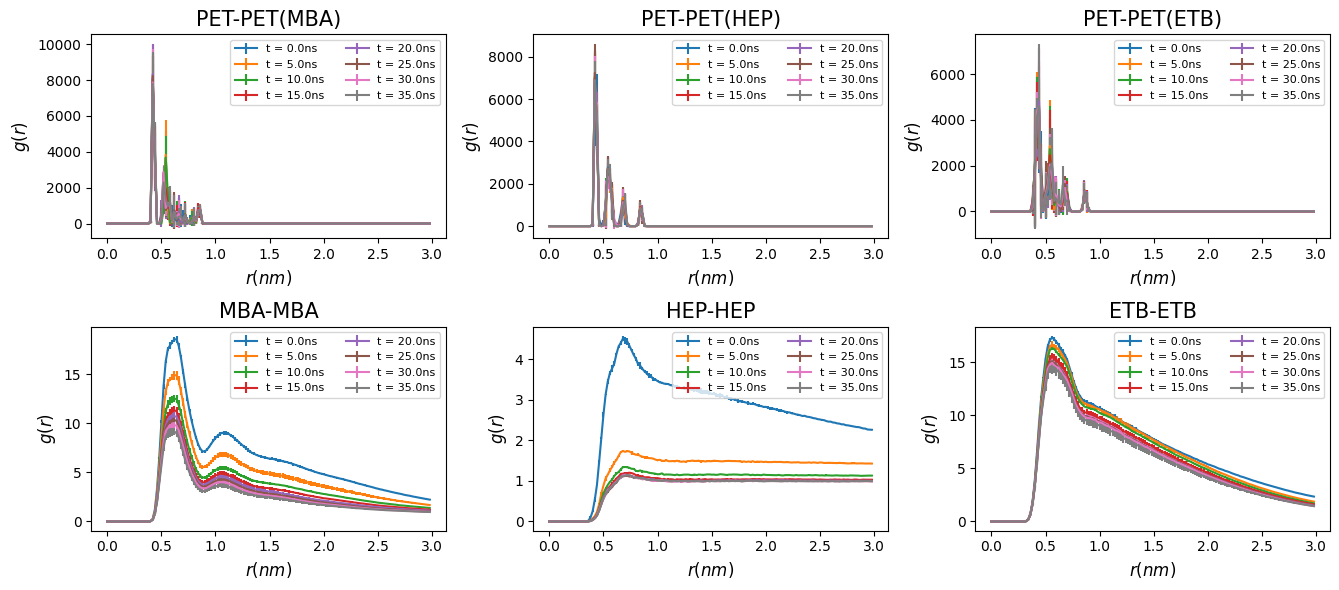

In [33]:
sz = 3
ar = 1.5

avg_in = avg_data.copy()
std_in = std_data.copy()

labels = [['PET-PET(MBA)', 'PET-PET(HEP)', 'PET-PET(ETB)'], ['MBA-MBA', 'HEP-HEP', 'ETB-ETB']]

fig, axs = plt.subplots(2, 3, figsize = (sz*ar*3, sz*2))

for i in range(3):
    for j in range(2):
        ax = axs[j, i] 
        for k in range(8):
            ax.errorbar(radii, avg_in[i, k, j, :], yerr=std_in[i, k, j, :], label = f"t = {times[k]/1000}ns")
        ax.legend(fontsize = 8, ncol = 2)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_title(f"{labels[j][i]}", fontsize = 15)
        ax.tick_params(axis='both', which='minor', labelsize=8)


fig.tight_layout()
fig.savefig("hyd_self-interactions_time-series.svg")
fig.savefig("hyd_self-interactions_time-series.png", dpi = 300)

[0.42 0.52 0.84]
[0.42 0.54 0.7  0.84]
[0.42 0.54 0.66 0.86]
[0.6  1.06]
[0.72 1.2  1.26 1.36 1.56 1.68 1.86 2.04 2.32 2.52 2.62 2.72 2.8  2.9 ]
[0.56]


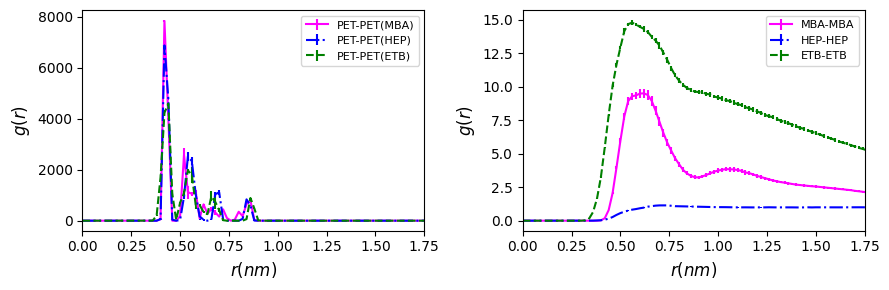

In [34]:
avg_all = np.mean(avg_data[:, time_slc, :, :], axis = 1)
std_all = np.std(avg_data[:, time_slc, :, :], axis = 1)
sz = 6
ar = 1.5

fig, axs = plt.subplots(1, 2, figsize = (sz*ar, sz/2))

for i in range(2):
    ax = axs[i]
    for j in range(3):

        x = radii
        y = avg_all[j, i]
        yerr = std_all[j, i]

        ysmooth = gaussian_filter(y, 1)
        idxs = find_peaks(ysmooth)[0]
        print(x[idxs][np.where(x[idxs] >= xmin)])

        ax.errorbar(x, y, yerr=yerr, label = labels[i][j], color = colors[j], linestyle = linestyles[j])
        ax.legend(fontsize = 8, ncol = 1)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        # ax.set_xlabel(r"$r (\AA)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        ax.set_xlim([xmin_all, xmax_all])
        # ax.set_ylim([0, 50])

fig.tight_layout()
fig.savefig("hyd_self-interactions.svg")
fig.savefig("hyd_self-interactions.png", dpi = 300)

## Cluster size

In [35]:
data = np.loadtxt("hydrated/run1/ETB/avgclustsize.xvg", comments=['@', '#'])

all_data = np.zeros((len(malodour_molecules), len(hydrated_paths), 3, data.shape[0])) 

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(hydrated_paths):
        spec_path = f"{path}/{mal}"
        # print(spec_path)
        nclust = np.loadtxt(spec_path + "/nclust.xvg", comments=['@', '#'])
        maxclustsz = np.loadtxt(spec_path + "/maxclustsize.xvg", comments=['@', '#'])
        avgclustsz = np.loadtxt(spec_path + "/avgclustsize.xvg", comments=['@', '#'])
        all_data[i, j, 0] = nclust[:, -1]
        all_data[i, j, 1] = maxclustsz[:, -1]/atoms_per_mol[i]
        all_data[i, j, 2] = avgclustsz[:, -1]/atoms_per_mol[i]

time = data[:, 0]/1000

all_data = np.where(all_data == 0, np.NaN, all_data)
avg_data = np.average(all_data, axis = 1)
std_data = np.std(all_data, axis = 1)

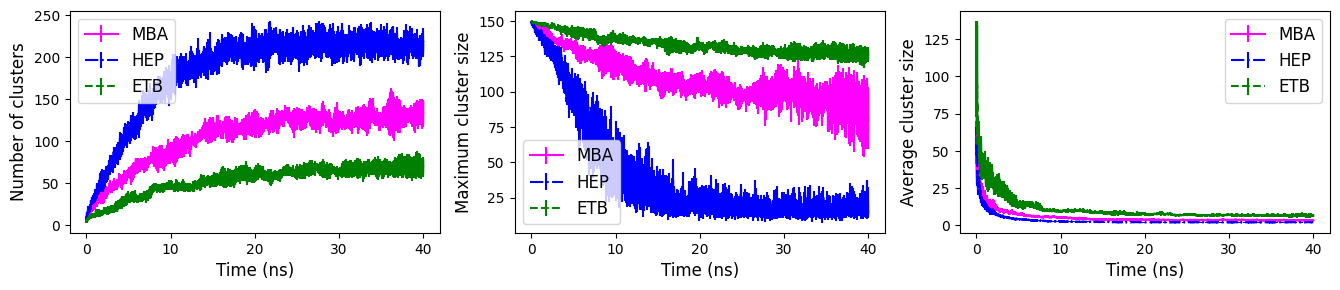

In [36]:
sz = 9
ar = 1.5

fig, axs = plt.subplots(1, 3, figsize = (sz*ar, sz/3))

ylabel = ["Number of clusters", "Maximum cluster size", "Average cluster size"]

for i in range(3):
    ax = axs[i]
    for j in range(len(malodour_molecules)):

        x = time
        y = avg_data[j, i]
        yerr = std_data[j, i]

        ax.errorbar(x, y, yerr = yerr, color = colors[j], linestyle = linestyles[j], label = malodour_molecules[j])
    
    ax.legend(fontsize = 12)
    ax.set_xlabel("Time (ns)", fontsize = 12)
    ax.set_ylabel(ylabel[i], fontsize = 12)

fig.tight_layout()
fig.savefig("hyd_cluster-stats.svg")
fig.savefig("hyd_cluster-stats.png", dpi = 300)

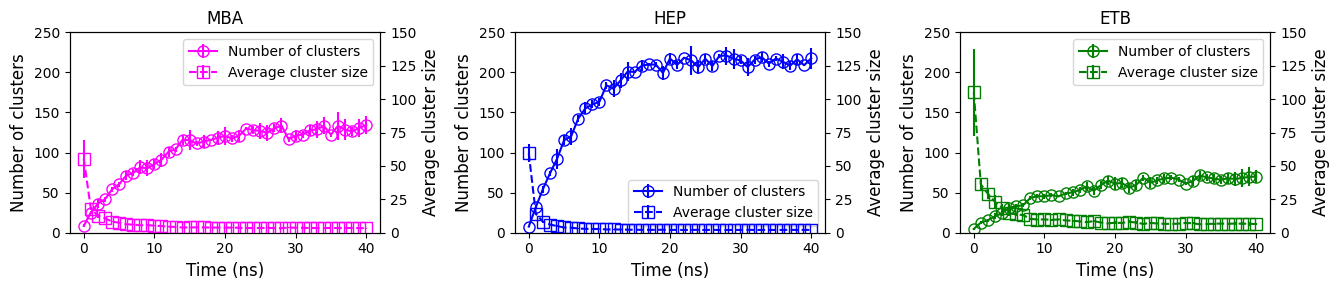

In [37]:
sz = 9
ar = 1.5

fig, axs = plt.subplots(1, 3, figsize = (sz*ar, sz/3))

slc = slice(0, time.size, 100)

for i in range(3):
    ax = axs[i]
    ax2 = ax.twinx()

    x = time[slc]
    y = avg_data[i, 0, slc] # number of clusters
    yerr = std_data[i, 0, slc]
    y2 = avg_data[i, -1, slc] # average size of clusters
    y2err = std_data[i, -1, slc]

    ax.errorbar(x, y, yerr = yerr, color = colors[i], linestyle = "-", label = ylabel[0], marker = 'o', markerfacecolor = 'None', ms = 8)
    ax2.errorbar(x, y2, yerr = y2err, color = colors[i], linestyle = "--", label = ylabel[-1], marker = 's', markerfacecolor = 'None', ms = 8)

    lns = []
    handles, _ = ax.get_legend_handles_labels()
    lns.append(handles[0])
    handles, _ = ax2.get_legend_handles_labels()
    lns.append(handles[0])

    ax.set_xlabel("Time (ns)", fontsize = 12)
    ax.set_ylabel(ylabel[0], fontsize = 12)
    ax2.set_ylabel(ylabel[-1], fontsize = 12)

    
    ax.set_ylim([0, 250])
    ax2.set_ylim([0, 150])
    ax.set_title(malodour_molecules[i])
    ax.legend(handles = lns)

fig.tight_layout()
fig.savefig("hyd_cluster-mal.svg")
fig.savefig("hyd_cluster-mal.png", dpi = 300)

## Binding energy

In [38]:
# lie_mal = MAL - PET
# lie_sol = SOL - PET
# lie_pet = MAL - SOL

data = np.loadtxt("hydrated/run1/ETB/lie_mal.xvg", comments=['@', '#'])

all_data = np.zeros((len(malodour_molecules), len(hydrated_paths), 3, data.shape[0])) 

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(hydrated_paths):
        spec_path = f"{path}/{mal}"
        
        data = np.loadtxt(spec_path + "/lie_mal.xvg", comments=['@', '#'])
        all_data[i, j, 0] = data[:, -1]

        data = np.loadtxt(spec_path + "/lie_sol.xvg", comments=['@', '#'])
        all_data[i, j, 1] = data[:, -1]

        data = np.loadtxt(spec_path + "/lie_pet.xvg", comments=['@', '#'])
        all_data[i, j, 2] = data[:, -1]

time = data[:, 0]/1000

all_data = np.where(all_data == 0, np.NaN, all_data)
avg_data = np.average(all_data, axis = 1)
std_data = np.std(all_data, axis = 1)

PET-MBA: -60097.600 pm 261.087$
PET-HEP: 12279.967 pm 161.586$
PET-ETB: -11308.333 pm 209.876$
PET-SOL: -19661.400 pm 69.679$
PET-SOL: -42091.333 pm 98.316$
PET-SOL: -13912.600 pm 276.042$
SOL-MBA: -20967.967 pm 69.638$
SOL-HEP: -46955.433 pm 98.316$
SOL-ETB: -12252.633 pm 276.015$


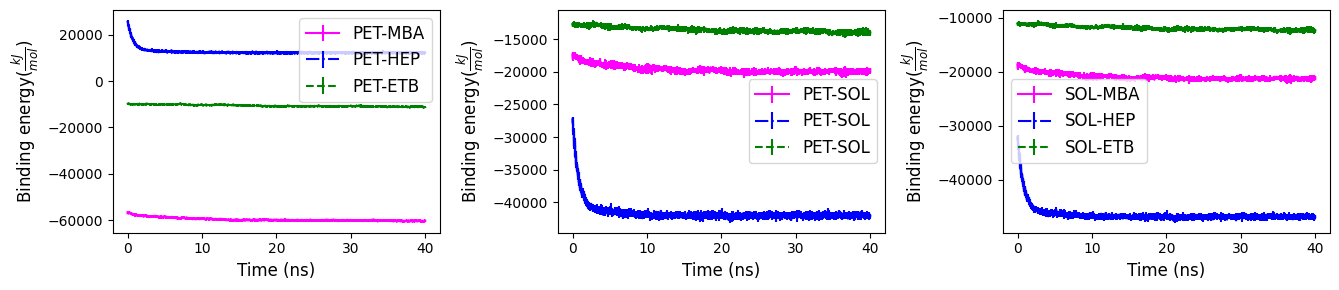

In [39]:
sz = 9
ar = 1.5

fig, axs = plt.subplots(1, 3, figsize = (sz*ar, sz/3))

ylabel = ["Number of clusters", "Maximum cluster size", "Average cluster size"]
titles = ["MAL-PET", "PET-SOL", "MAL-SOL"]
labels = [["PET-MBA", "PET-HEP", "PET-ETB"], ["PET-SOL"]*3, ["SOL-MBA", "SOL-HEP", "SOL-ETB"]]

for i in range(len(malodour_molecules)):
    ax = axs[i]
    for j in range(3):
        x = time
        y = avg_data[j, i]
        yerr = std_data[j, i]
        print(f"{labels[i][j]}: {y[-1]:.3f} pm {yerr[-1]:.3f}$")
        ax.errorbar(x, y, yerr = yerr, color = colors[j], linestyle = linestyles[j], label = labels[i][j])
    
    ax.legend(fontsize = 12)
    ax.set_xlabel("Time (ns)", fontsize = 12)
    ax.set_ylabel(r"Binding energy($\frac{kJ}{mol}$)", fontsize = 12)

fig.tight_layout()
fig.savefig("hyd_binding-energy.svg")
fig.savefig("hyd_binding-energy.png", dpi = 300)

# Anhydrous

In [40]:
anhydrous_paths = sorted(glob.glob("anhydrous/run*"))


times = np.arange(0, 40000, 5000)
# labels = ["void", "radii", "PET", "MBA", "HEP", "ETB", "SOL"]

# indexes to get
# PET - mal
# PET - water
# mal - water

## Bonding interactions

In [41]:
max_idx = 901
slc = slice(0, max_idx)

dipole = np.zeros((len(malodour_molecules), len(anhydrous_paths), 9, 2, max_idx)) 
vdw = np.zeros((len(malodour_molecules), len(anhydrous_paths), 9, 2, max_idx))

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(anhydrous_paths):
        spec_path = f"{path}/{mal}"
        rdf_dipole_paths = sorted(glob.glob(spec_path + "/rdf_dipole*"))
        rdf_vdw_paths = sorted(glob.glob(spec_path + "/rdf_vdw*"))

        for k in range(len(rdf_dipole_paths)):
            data = np.loadtxt(rdf_dipole_paths[k], comments=['@', '#'])
            dipole[i, j, k, 0, :] = data[slc, -2] # dipole interaction
            dipole[i, j, k, 1, :] = data[slc, -1] # vdw interaction

            data = np.loadtxt(rdf_vdw_paths[k], comments=['@', '#'])
            vdw[i, j, k, 0, :] = data[slc, -2] # vdw interaction
            vdw[i, j, k, 1, :] = data[slc, -1] # dipole interaction

radii = data[slc, 0]

avg_dipole = np.average(dipole, axis = 1)
std_dipole = np.std(dipole, axis = 1)

avg_vdw = np.average(vdw, axis = 1)
std_vdw = np.std(vdw, axis = 1)

### Dipolar interactions

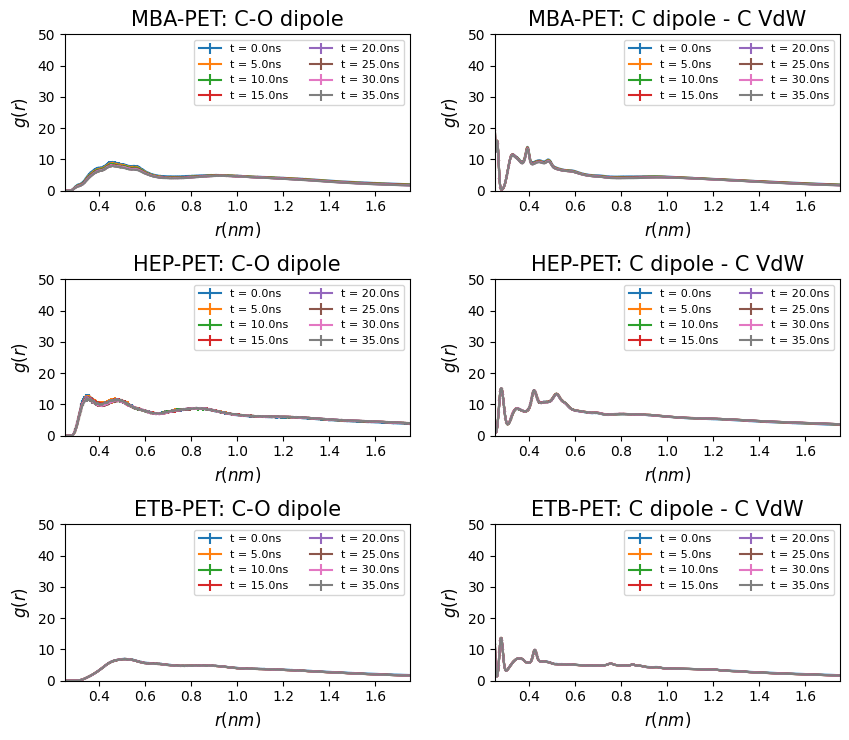

In [42]:
sz = 15
ar = 1.75

avg_in = avg_dipole.copy()
std_in = std_dipole.copy()

labels = [["MBA-PET: C-O dipole", "MBA-PET: C dipole - C VdW"], ["HEP-PET: C-O dipole", "HEP-PET: C dipole - C VdW"], ["ETB-PET: C-O dipole", "ETB-PET: C dipole - C VdW"]]

fig, axs = plt.subplots(3, 2, figsize = (sz*ar/3, sz/2))

xmin = 0.25
xmax = 1.75

ymin = 0
ymax = 50

for i in range(3):
    for j in range(2):
        ax = axs[i, j] 
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        for k in range(8):
            ax.errorbar(radii, np.abs(avg_in[i, k, j, :]), yerr=std_in[i, k, j, :], label = f"t = {times[k]/1000}ns")
        ax.legend(fontsize = 8, ncol = 2)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_title(f"{labels[i][j]}", fontsize = 15)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        # ax.set_yscale('log')

fig.tight_layout()
fig.savefig("anhyd_dipole-bond_time-series.svg")
fig.savefig("anhyd_dipole-bond_time-series.png", dpi = 300)

[0.456]
[0.35  0.478 0.818]
[0.512]
[0.328 0.392]
[0.278 0.422 0.518]
[0.278 0.356 0.424]


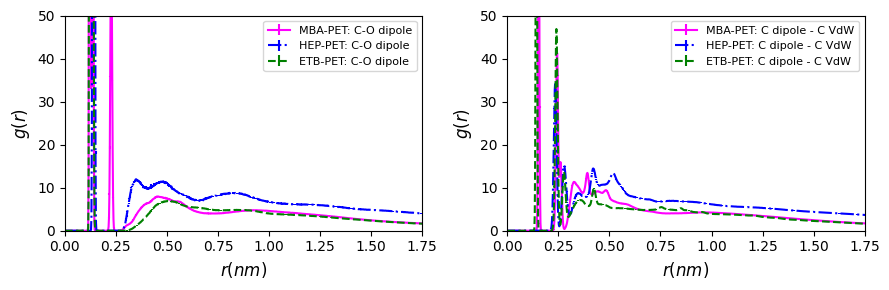

In [43]:
avg_all = np.mean(avg_dipole[:, time_slc, :, :], axis = 1)
std_all = np.std(avg_dipole[:, time_slc, :, :], axis = 1)

sz = 6
ar = 1.5

fig, axs = plt.subplots(1, 2, figsize = (sz*ar, sz/2))

# avg_all.shape

for i in range(2):
    ax = axs[i]
    for j in range(3):
        x = radii
        y = avg_all[j, i]
        yerr = std_all[j, i]

        ysmooth = gaussian_filter(y, 2)
        out = find_peaks(ysmooth, prominence=1)
        idxs = out[0]
        prom = out[1]["prominences"]
        # print(x[np.argsort(prom)])
        print(x[idxs][np.where(x[idxs] >= xmin)])
        # print(find_peaks(ysmooth, prominence=1))

        # ax.plot(x, ysmooth, label = labels[j][i], color = colors[j], linestyle = linestyles[j])
        ax.errorbar(x, y, yerr=yerr, label = labels[j][i], color = colors[j], linestyle = linestyles[j])
        ax.legend(fontsize = 8, ncol = 1)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        
        # ax.set_xlabel(r"$r (\AA)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        ax.set_xlim([xmin_all, xmax_all])
        ax.set_ylim([0, 50])
        

fig.tight_layout()
fig.savefig("anhyd_dipole-bond.svg")
fig.savefig("anhyd_dipole-bond.png", dpi = 300)

### VdW interactions

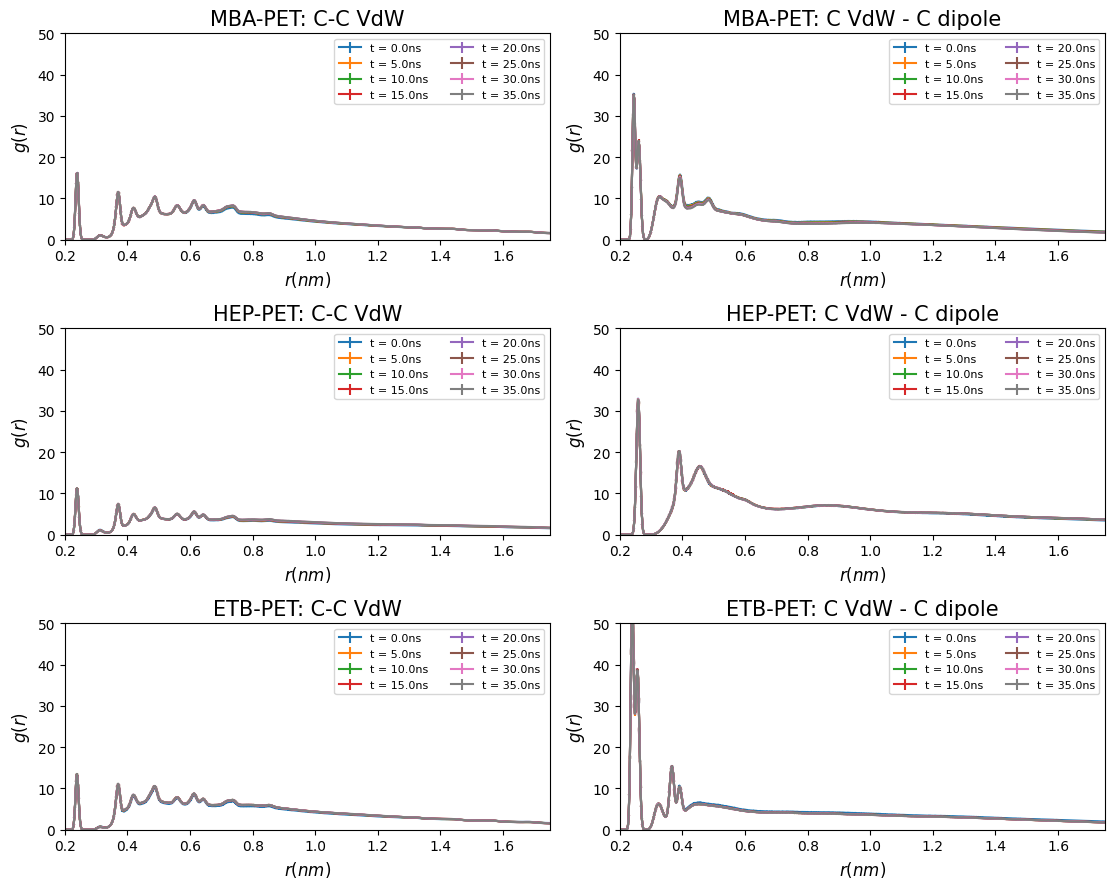

In [44]:
sz = 9
ar = 1.25

avg_in = avg_vdw.copy()
std_in = std_vdw.copy()

labels = [["MBA-PET: C-C VdW", "MBA-PET: C VdW - C dipole"], ["HEP-PET: C-C VdW", "HEP-PET: C VdW - C dipole"], ["ETB-PET: C-C VdW", "ETB-PET: C VdW - C dipole"]]

fig, axs = plt.subplots(3, 2, figsize = (sz*ar, sz))

xmin = 0.2
xmax = 1.75

ymin = 0
ymax = 50

for i in range(3):
    for j in range(2):
        ax = axs[i, j] 
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        for k in range(8):
            ax.errorbar(radii, np.abs(avg_in[i, k, j, :]), yerr=std_in[i, k, j, :], label = f"t = {times[k]/1000}ns")
        ax.legend(fontsize = 8, ncol = 2)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_title(f"{labels[i][j]}", fontsize = 15)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        # ax.set_yscale('log')

fig.tight_layout()
fig.savefig("anhyd_vdw-bond_time-series.svg")
fig.savefig("anhyd_vdw-bond_time-series.png", dpi = 300)

[0.24  0.37  0.42  0.486 0.56  0.612 0.734]
[0.238 0.37  0.42  0.486 0.558 0.612]
[0.238 0.37  0.42  0.486 0.558 0.612 0.734]
[0.246 0.328 0.392 0.482]
[0.258 0.39  0.456]
[0.24  0.324 0.366 0.39  0.456]


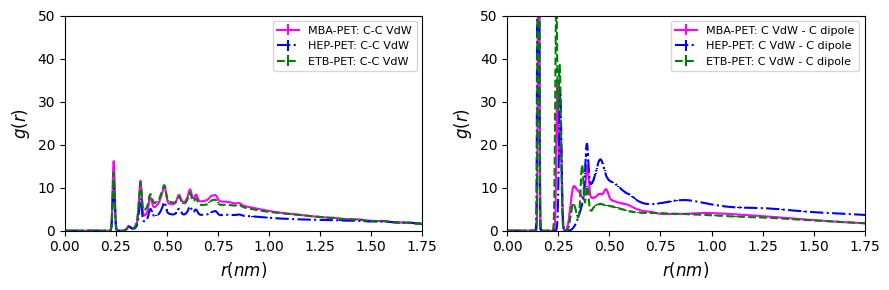

In [45]:
avg_all = np.mean(avg_vdw[:, time_slc, :, :], axis = 1)
std_all = np.std(avg_vdw[:, time_slc, :, :], axis = 1)

sz = 6
ar = 1.5
fig, axs = plt.subplots(1, 2, figsize = (sz*ar, sz/2))

# avg_all.shape

for i in range(2):
    ax = axs[i]
    for j in range(3):
        x = radii
        y = avg_all[j, i]
        yerr = std_all[j, i]

        ysmooth = gaussian_filter(y, 2)
        idxs = find_peaks(ysmooth, prominence=1)[0]
        print(x[idxs][np.where(x[idxs] >= xmin)])

        # ax.plot(x, ysmooth, label = labels[j][i], color = colors[j], linestyle = linestyles[j])
        ax.errorbar(x, y, yerr=yerr, label = labels[j][i], color = colors[j], linestyle = linestyles[j])
        ax.legend(fontsize = 8, ncol = 1)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        
        # ax.set_xlabel(r"$r (\AA)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.tick_params(axis='both', which='minor', labelsize=8)
        ax.set_xlim([xmin_all, xmax_all])
        ax.set_ylim([0, 50])
        

fig.tight_layout()
fig.savefig("anhyd_vdw-bond.svg")
fig.savefig("anhyd_vdw-bond.png", dpi = 300)

## RDF

### Inter-species

In [46]:
max_idx = 101
slc = slice(0, max_idx)

all_data = np.zeros((len(malodour_molecules), len(anhydrous_paths), 9, max_idx)) 

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(anhydrous_paths):
        spec_path = f"{path}/{mal}"
        rdf_PET_paths = sorted(glob.glob(spec_path + "/rdf_PET*"))
        # rdf_mal_paths = sorted(glob.glob(spec_path + "/rdf_mal*"))
        if len(rdf_PET_paths) > 0:
            for k in range(len(rdf_PET_paths)):
                data = np.loadtxt(rdf_PET_paths[k], comments=['@', '#'])
                all_data[i, j, k, :] = data[slc, -1]
        else:
            continue

radii = data[slc, 0]

# all_data = np.where(all_data == 0, np.NaN, all_data)
avg_data = np.average(all_data, axis = 1)
std_data = np.std(all_data, axis = 1)

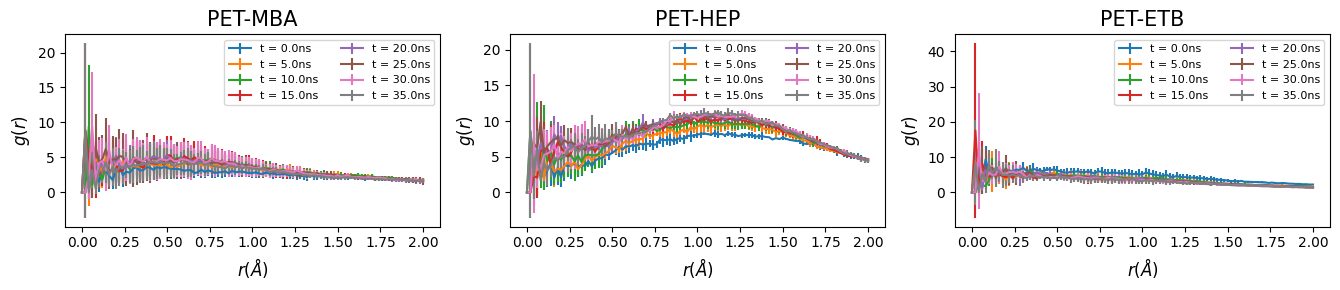

In [47]:
sz = 9
ar = 1.5

avg_in = avg_data.copy()
std_in = std_data.copy()

labels = ["PET-MAL", "PET-SOL", "MAL-SOL"]

fig, axs = plt.subplots(1, 3, figsize = (sz*ar, sz/3))

for i in range(3):
    ax = axs[i]
    for k in range(8):
        
        ax.errorbar(radii, avg_in[i, k], yerr=std_in[i, k], label = f"t = {times[k]/1000}ns")
    
    ax.legend(fontsize = 8, ncol = 2)
    ax.set_ylabel(r"$g(r)$", fontsize = 12)
    ax.set_xlabel(r"$r (\AA)$", fontsize = 12)
    ax.set_title(f"PET-{malodour_molecules[i]}", fontsize = 15)

fig.tight_layout()
fig.savefig("anhyd_mal-pet_time-series.svg")
fig.savefig("anhyd_mal-pet_time-series.png", dpi = 300)

[0.4  0.46 0.6  0.68 1.26 1.54]
[0.94 1.06 1.26]
[0.24 0.36 0.52 0.62 0.74 0.92 1.02]


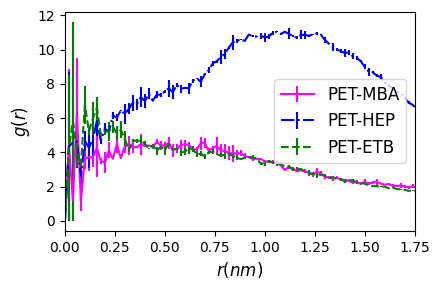

In [48]:
avg_anhyd_rdf = np.average(avg_in[:, time_slc, :], axis = 1)
std_anhyd_rdf = np.std(avg_in[:, time_slc, :], axis = 1)

sz = 3
ar = 1.5
fig, ax = plt.subplots(1, 1, figsize = (sz*ar, sz))

for i in range(3):
    x = radii
    y = avg_anhyd_rdf[i]
    yerr = std_anhyd_rdf[i]

    ysmooth = gaussian_filter(y, 1)
    idxs = find_peaks(ysmooth)[0]
    print(x[idxs][np.where(x[idxs] >= xmin)])

    # ax.plot(x, y, label = f"PET-{malodour_molecules[i]}", color = colors[i], linestyle = linestyles[i])
    # ax.plot(x, ysmooth, label = f"PET-{malodour_molecules[i]}", color = colors[i], linestyle = linestyles[i])
    ax.errorbar(x, y, yerr=yerr, label = f"PET-{malodour_molecules[i]}", color = colors[i], linestyle = linestyles[i])


ax.set_xlim([xmin_all, xmax_all])
ax.legend(fontsize = 12)
ax.set_ylabel(r"$g(r)$", fontsize = 12)
ax.set_xlabel(r"$r (nm)$", fontsize = 12)
fig.tight_layout()
fig.savefig("anhyd_mal-pet.svg")
fig.savefig("anhyd_mal-pet.png", dpi = 300)

### Intra-species

In [49]:
max_idx = 101
slc = slice(0, max_idx)

all_data = np.zeros((len(malodour_molecules), len(anhydrous_paths), 9, 2, max_idx))

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(anhydrous_paths):
        spec_path = f"{path}/{mal}"
        rdf_PET_paths = sorted(glob.glob(spec_path + "/rdf_PET*"))
        rdf_mal_paths = sorted(glob.glob(spec_path + "/rdf_mal*"))
        if len(rdf_PET_paths) > 0:
            for k in range(len(rdf_PET_paths)):
                data = np.loadtxt(rdf_PET_paths[k], comments=['@', '#'])
                all_data[i, j, k, 0, :] = data[slc, 1]

                data = np.loadtxt(rdf_mal_paths[k], comments=['@', '#'])
                all_data[i, j, k, 1, :] = data[slc, 1]
        else:
            continue

radii = data[slc, 0]

# all_data = np.where(all_data == 0, np.NaN, all_data)
avg_data = np.average(all_data, axis = 1)
std_data = np.std(all_data, axis = 1)

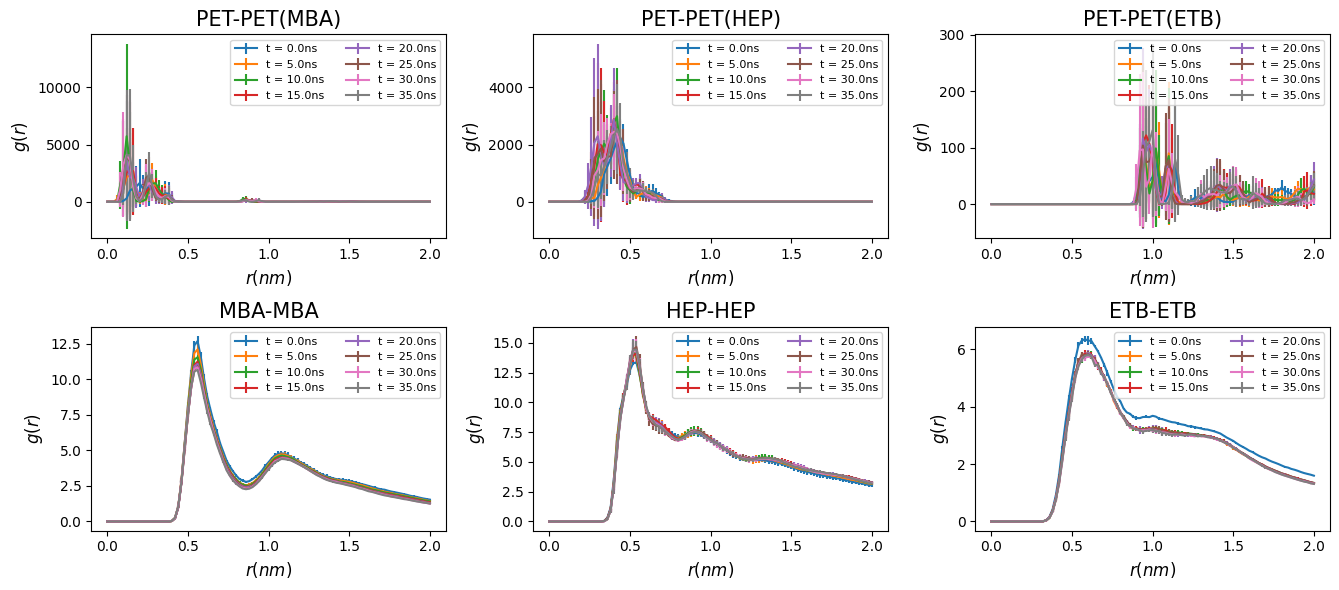

In [50]:
sz = 3
ar = 1.5

avg_in = avg_data.copy()
std_in = std_data.copy()

labels = [['PET-PET(MBA)', 'PET-PET(HEP)', 'PET-PET(ETB)'], ['MBA-MBA', 'HEP-HEP', 'ETB-ETB']]

fig, axs = plt.subplots(2, 3, figsize = (sz*ar*3, sz*2))

for i in range(3):
    for j in range(2):
        ax = axs[j, i] 
        for k in range(8):
            ax.errorbar(radii, avg_in[i, k, j, :], yerr=std_in[i, k, j, :], label = f"t = {times[k]/1000}ns")
        ax.legend(fontsize = 8, ncol = 2)
        ax.set_ylabel(r"$g(r)$", fontsize = 12)
        ax.set_xlabel(r"$r (nm)$", fontsize = 12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.set_title(f"{labels[j][i]}", fontsize = 15)
        ax.tick_params(axis='both', which='minor', labelsize=8)


fig.tight_layout()
fig.savefig("anhyd_self-interactions_time-series.svg")
fig.savefig("anhyd_self-interactions_time-series.png", dpi = 300)

[0.26 0.36 0.86 0.92 1.4 ]
[0.4]
[0.98 1.14 1.36 1.5  1.64 1.88]
[0.56 1.1 ]
[0.52 0.9  1.34]
[0.6  0.98]


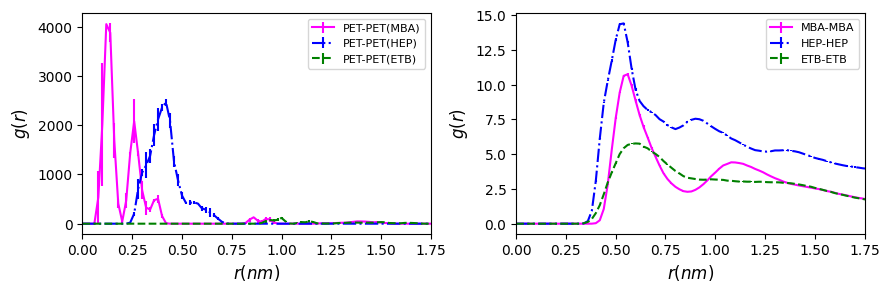

In [51]:
avg_all = np.mean(avg_data[:, time_slc, :, :], axis = 1)
std_all = np.std(avg_data[:, time_slc, :, :], axis = 1)
sz = 6
ar = 1.5

fig, axs = plt.subplots(1, 2, figsize = (sz*ar, sz/2))

for i in range(2):
    ax = axs[i]
    for j in range(3):

        x = radii
        y = avg_all[j, i]
        yerr = std_all[j, i]

        ysmooth = gaussian_filter(y, 1)
        idxs = find_peaks(ysmooth)[0]
        print(x[idxs][np.where(x[idxs] >= xmin)])

        ax.errorbar(x, y, yerr=yerr, label = labels[i][j], color = colors[j], linestyle = linestyles[j])
    ax.legend(fontsize = 8, ncol = 1)
    ax.set_ylabel(r"$g(r)$", fontsize = 12)
    # ax.set_xlabel(r"$r (\AA)$", fontsize = 12)
    ax.set_xlabel(r"$r (nm)$", fontsize = 12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.set_xlim([xmin_all, xmax_all])
    # ax.set_yscale('log')

fig.tight_layout()
fig.savefig("anhyd_self-interactions.svg")
fig.savefig("anhyd_self-interactions.png", dpi = 300)

## Cluster size

In [52]:
data = np.loadtxt("anhydrous/run1/ETB/avgclustsize.xvg", comments=['@', '#'])

all_data = np.zeros((len(malodour_molecules), len(anhydrous_paths), 3, data.shape[0])) 

for i, mal in enumerate(malodour_molecules):
    for j, path in enumerate(anhydrous_paths):
        spec_path = f"{path}/{mal}"
        nclust = np.loadtxt(spec_path + "/nclust.xvg", comments=['@', '#'])
        maxclustsz = np.loadtxt(spec_path + "/maxclustsize.xvg", comments=['@', '#'])
        avgclustsz = np.loadtxt(spec_path + "/avgclustsize.xvg", comments=['@', '#'])
        all_data[i, j, 0] = nclust[:, -1]
        all_data[i, j, 1] = maxclustsz[:, -1]/atoms_per_mol[i]
        all_data[i, j, 2] = avgclustsz[:, -1]/atoms_per_mol[i]

time = data[:, 0]/1000

all_data = np.where(all_data == 0, np.NaN, all_data)
avg_data = np.average(all_data, axis = 1)
std_data = np.std(all_data, axis = 1)

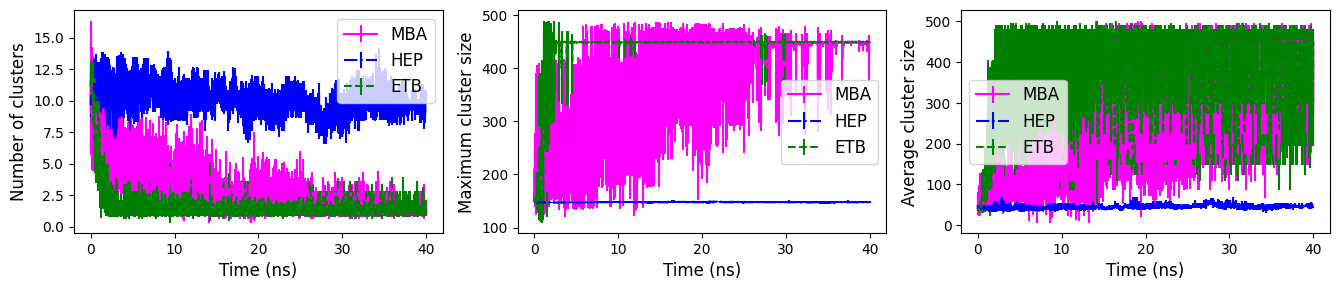

In [53]:
sz = 9
ar = 1.5

fig, axs = plt.subplots(1, 3, figsize = (sz*ar, sz/3))

ylabel = ["Number of clusters", "Maximum cluster size", "Average cluster size"]

for i in range(3):
    ax = axs[i]
    for j in range(len(malodour_molecules)):

        x = time
        y = avg_data[j, i]
        yerr = std_data[j, i]

        # ax.plot(x, y, color = colors[j], linestyle = linestyles[j], label = malodour_molecules[j])
        ax.errorbar(x, y, yerr = yerr, color = colors[j], linestyle = linestyles[j], label = malodour_molecules[j])
    
    ax.legend(fontsize = 12)
    ax.set_xlabel("Time (ns)", fontsize = 12)
    ax.set_ylabel(ylabel[i], fontsize = 12)

fig.tight_layout()
fig.savefig("anhyd_cluster-stats.svg")
fig.savefig("anhyd_cluster-stats.png", dpi = 300)

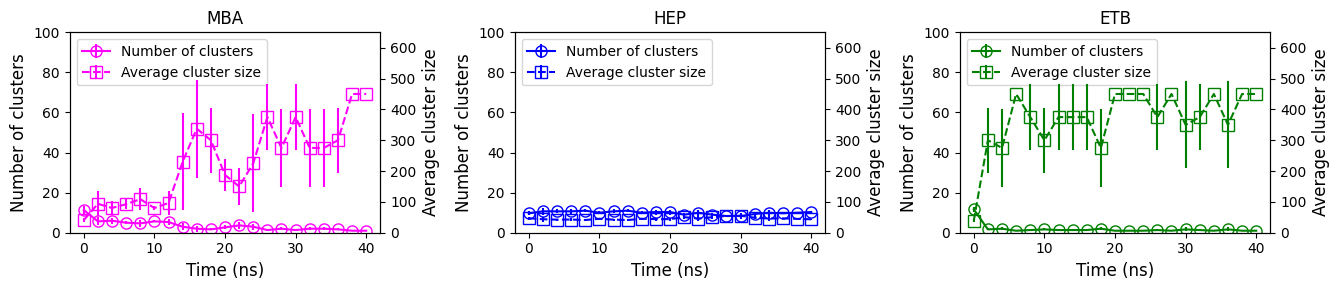

In [54]:
sz = 9
ar = 1.5

fig, axs = plt.subplots(1, 3, figsize = (sz*ar, sz/3))

slc = slice(0, time.size, 100)

for i in range(3):
    ax = axs[i]
    ax2 = ax.twinx()

    x = time[slc]
    y = avg_data[i, 0, slc] # number of clusters
    yerr = std_data[i, 0, slc]
    y2 = avg_data[i, -1, slc] # average size of clusters
    y2err = std_data[i, -1, slc]

    ax.errorbar(x, y, yerr = yerr, color = colors[i], linestyle = "-", label = ylabel[0], marker = 'o', markerfacecolor = 'None', ms = 8)
    ax2.errorbar(x, y2, yerr = y2err, color = colors[i], linestyle = "--", label = ylabel[-1], marker = 's', markerfacecolor = 'None', ms = 8)

    lns = []
    handles, _ = ax.get_legend_handles_labels()
    lns.append(handles[0])
    handles, _ = ax2.get_legend_handles_labels()
    lns.append(handles[0])

    ax.set_xlabel("Time (ns)", fontsize = 12)
    ax.set_ylabel(ylabel[0], fontsize = 12)
    ax2.set_ylabel(ylabel[-1], fontsize = 12)

    
    ax.set_ylim([0, 100])
    ax2.set_ylim([0, 650])
    ax.set_title(malodour_molecules[i])
    ax.legend(handles = lns, loc = 'upper left')

fig.tight_layout()
fig.savefig("anhyd_cluster-mal.svg")
fig.savefig("anhyd_cluster-mal.png", dpi = 300)